# 앙상블 기법

- 보팅: 다수결 투표

- 배깅: 데이터를 복원추출을 사용해서 생성하고 이러한 다양한 데이터를 각 모델에 적용

Ex) 배깅을 사용한 트리 - 랜덤 포레스트

- 부스팅: 분류기를 차례로 연결하는 방식

Ex) 에이다부스트

# 랜덤포레스트 (Wine 데이터셋)

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##1.데이터준비

In [88]:
!unzip /content/drive/MyDrive/SKT_FLY_AI/Dataset/wine+quality.zip

Archive:  /content/drive/MyDrive/SKT_FLY_AI/Dataset/wine+quality.zip
replace winequality-red.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace winequality-white.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace winequality.names? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [89]:
df = pd.read_csv('/content/winequality-red.csv', sep=';')
df.shape

(1599, 12)

In [90]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [91]:
df.columns = [ col.replace(' ','_') for col in df.columns]
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


##2.정보확인

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


###종속변수


In [94]:
# 1,2 등급 없으니까 -3 해서 분류기 돌려야 함
df['quality'].value_counts().sort_index()

,count
quality,
3,10
4,53
5,681
6,638
7,199
8,18


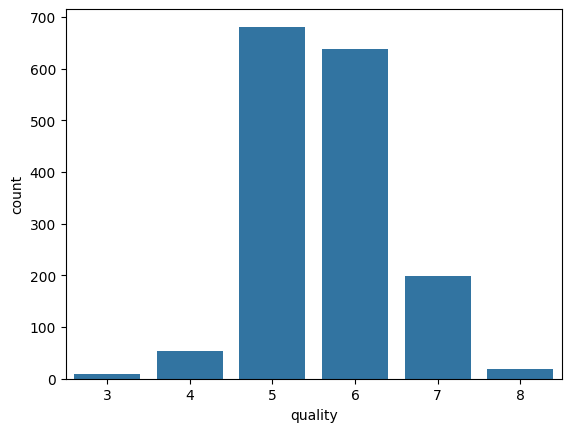

In [95]:
sns.countplot(data = df, x='quality')
plt.show()

###타깃 범주 변경
- 3,4 -> low

- 5,6 -> midium

- 7,8 -> high

In [96]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [97]:
df.loc[(df['quality']==3) | (df['quality']==4), 'quality'] = 'low'
df.loc[(df['quality']==5) | (df['quality']==6), 'quality'] = 'midium'
df.loc[(df['quality']==7) | (df['quality']==8), 'quality'] = 'high'

<ipython-input-97-82d58277fe5d>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'low' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['quality']==3) | (df['quality']==4), 'quality'] = 'low'


In [98]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,midium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,midium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,midium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,midium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,midium


In [99]:
df['quality'].value_counts()

,count
quality,
midium,1319
high,217
low,63


###결측치 확인

In [100]:
df.isna().sum()

,0
fixed_acidity,0
volatile_acidity,0
citric_acid,0
residual_sugar,0
chlorides,0
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
pH,0
sulphates,0


##4.데이터분리

In [101]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [103]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1279, 11), (320, 11), (1279,), (320,))

In [104]:
# 데이터 분균형이 심해서 맞춰줘야 함
# imbalanced 사용
y_train.value_counts()

,count
quality,
midium,1055
high,174
low,50


In [105]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_r, y_train_r = smote.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [106]:
X_train_r.shape, y_train_r.shape

((3957, 11), (3957,))

In [107]:
y_train_r.value_counts()

,count
quality,
midium,1319
high,1319
low,1319


In [108]:
X_train_r.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


##5.베이스모델

In [110]:
columns = X_train.columns

In [109]:
X_train_r = X_train_r.to_numpy()
y_train_r = y_train_r.to_numpy()

In [84]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_r, y_train_r)

RandomForestClassifier(random_state=42)

##6.테스트

In [115]:
y_pred = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [85]:
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  re = recall_score(y_true, y_pred, average='macro')
  pre = precision_score(y_true, y_pred, average='macro')
  f1 = f1_score(y_true, y_pred, average='macro')

  print("acc:", acc)
  print("recall:", np.around(re, 4))
  print("precision:", np.around(pre, 4))
  print("f1:", np.around(f1, 4))

  cfm = confusion_matrix(y_true, y_pred)
  s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
  s.set(xlabel='Prediction', ylabel='Actual')
  plt.show()

acc: 1.0
recall: 1.0
precision: 1.0
f1: 1.0


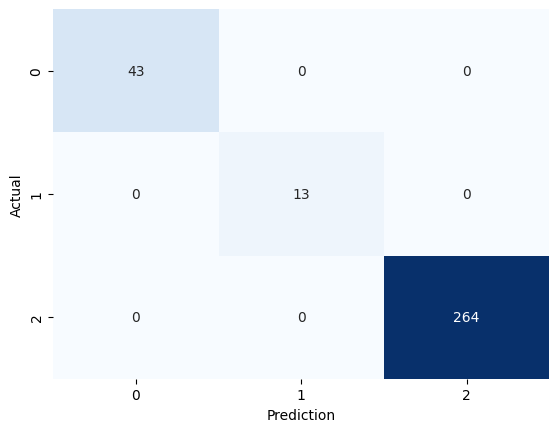

In [116]:
s

##중요변수

In [111]:
columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [117]:
importance = pd.DataFrame(clf.feature_importances_, columns, columns=['importance'])
importance.sort_values(by=['importance'], ascending=False)

,importance
alcohol,0.161070
volatile_acidity,0.154197
sulphates,0.146544
total_sulfur_dioxide,0.103565
citric_acid,0.072514
pH,0.068168
free_sulfur_dioxide,0.067484
chlorides,0.058955
residual_sugar,0.057281
density,0.056527


# 다른 모델 학습시키기

In [126]:
X = df.drop('quality', axis=1)
y = df['quality']

- 학습, 테스트 데이터 분리
- 스케일링, 인코딩
- SCV 학습
- 데이트 -> 평가

##1.데이터분리

In [166]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

In [167]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1279, 11), (320, 11), (1279,), (320,))

In [168]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_r, y_train_r = smote.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [169]:
y_train.value_counts()

,count
quality,
midium,1055
high,174
low,50


In [170]:
y_train_r.value_counts()

,count
quality,
midium,1319
high,1319
low,1319


##2.스케일링

In [171]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_s = ss.fit_transform(X_train_r)
X_train_s

array([[-0.53669515,  0.65809246, -1.32539097, ...,  1.21866099,
        -0.58539695, -1.18001832],
       [-0.2986193 ,  1.49398873, -1.32539097, ..., -0.87611123,
         0.1421243 , -0.80439315],
       [-0.2986193 ,  0.93672455, -1.12424952, ..., -0.47067144,
        -0.03975601, -0.80439315],
       ...,
       [-0.96288525, -0.65276455,  0.10430259, ..., -0.48169449,
         0.42419087,  0.1218244 ],
       [-0.45489617,  0.09933845, -0.89992804, ...,  0.17636985,
        -0.99843699, -1.5110505 ],
       [-0.8982242 ,  0.76886119, -1.20278615, ...,  1.23704114,
        -0.51727442,  0.19671641]])

In [172]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_r = le.fit_transform(y_train_r)
y_train_r

array([2, 2, 2, ..., 1, 1, 1])

In [173]:
type(X_train_s), type(y_train_r)

(numpy.ndarray, numpy.ndarray)

In [174]:
X_train_s.shape, y_train_r.shape

((3957, 11), (3957,))

###3.학습

In [175]:
from sklearn.svm import SVC

clf = SVC(random_state=42)
clf.fit(X_train_s, y_train_r)

SVC(random_state=42)

##4.테스트

In [176]:
X_test_s = ss.fit_transform(X_test)

In [177]:
type(X_test_s)

numpy.ndarray

In [182]:
X_test_s.shape, y_test.shape

((320, 11), (320,))

In [184]:
y_test_r = le.fit_transform(y_test)

In [179]:
y_pred = clf.predict(X_test_s)
y_pred

array([1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 0, 2, 1, 2, 0, 2, 2, 2,
       1, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 2, 0, 2,
       2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 1, 0, 0, 1, 1, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 1, 2, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 1, 0, 0, 1, 0, 1, 2,
       0, 2, 2, 1, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 0, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1,
       0, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1,
       1, 1, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 1, 2, 0,
       2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 1, 1, 1, 2, 2, 2,
       1, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2,

##5.모델평가

In [180]:
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  re = recall_score(y_true, y_pred, average='macro')
  pre = precision_score(y_true, y_pred, average='macro')
  f1 = f1_score(y_true, y_pred, average='macro')

  print("acc:", acc)
  print("recall:", np.around(re, 4))
  print("precision:", np.around(pre, 4))
  print("f1:", np.around(f1, 4))

  cfm = confusion_matrix(y_true, y_pred)
  s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
  s.set(xlabel='Prediction', ylabel='Actual')
  plt.show()

acc: 0.703125
recall: 0.8427
precision: 0.5544
f1: 0.5832


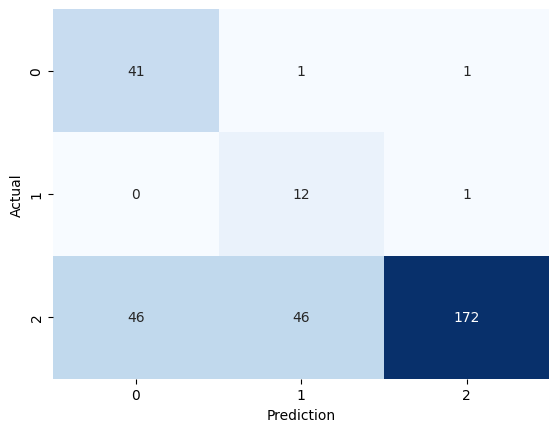

In [185]:
print_metrics(y_test_r, y_pred)

#끝